In [3]:
import nibabel as nib 
from glob import glob 
import numpy as np 
import matplotlib.pyplot as plt 

roi_path="/data/kleinrl/Wholebrain2.0/ANAT/ANAT_working_recon-all/ANAT/LAYNII_VASO_LN/rois.thalamic.l3"
roi_name="8109.lh.LGN.nii"
roi=roi_path+'/'+roi_name 

epis=glob("/data/kleinrl/Wholebrain2.0/DAY*/run*/VASO_LN.nii")
epis.sort()

epis=epis[1:]
epis.append("/data/kleinrl/Wholebrain2.0/VASO_LN.4dmean.WITHOUT_D1R1.nii")
print(epis)

['/data/kleinrl/Wholebrain2.0/DAY1/run2/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY1/run3/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY1/run5/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY2/run1/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY2/run2/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY2/run3/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY2/run4/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY2/run5/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY3/run1/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY3/run2/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY3/run3/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY3/run4/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/DAY3/run5/VASO_LN.nii', '/data/kleinrl/Wholebrain2.0/VASO_LN.4dmean.WITHOUT_D1R1.nii']


In [2]:
roi_img = nib.load(roi)
roi_data = roi_img.get_fdata()

ts_1D = []
ts_2D = []
for epi in epis: 
    epi_img = nib.load(epi)
    epi_data = epi_img.get_fdata()
    
    ind = np.where(roi_data == 1)
    ind_data = epi_data[ind]

    ts_1D.append(np.mean(ind_data,0))
    ts_2D.append(ind_data)


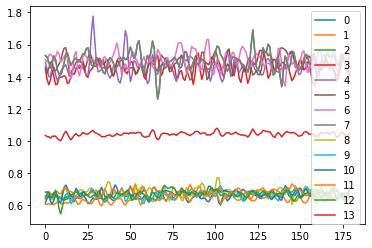

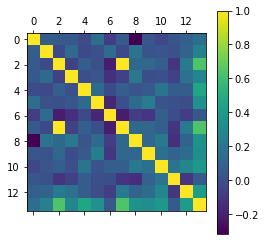

In [17]:
t_ravel = []
i = 0 

fig = plt.figure()
ax = fig.add_subplot(111)

for t in ts_1D: 
    plt.plot(t, label=str(i))
    t_ravel.append(t)
    i += 1 
ax.legend() #(handles=[ str(i) for i in range(len(ts_1D))])

corr = np.corrcoef(t_ravel)
plt.matshow(corr)
plt.colorbar()



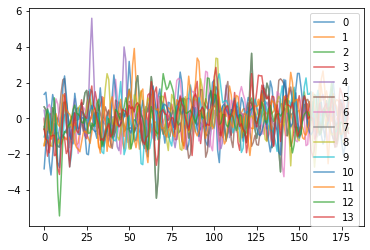

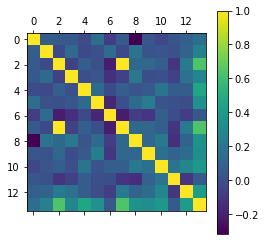

In [19]:
i=0 
t_ravel = []
fig = plt.figure()
ax = fig.add_subplot(111)
for t in ts_1D:
    t = (t - np.mean(t))/np.std(t) 
    t_ravel.append(t)
    plt.plot(t, alpha=0.7, label=str(i))
    i += 1 
ax.legend()

corr = np.corrcoef(t_ravel)
plt.matshow(corr)
plt.colorbar()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(14, 34716)


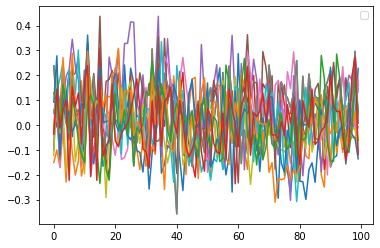

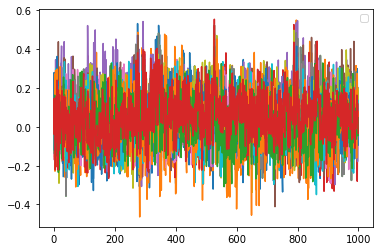

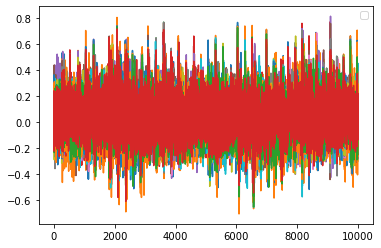

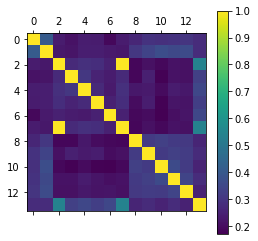

In [20]:
c_ravel = []
for t in ts_2D: 
    c = np.corrcoef(t)
    c_tri = c[np.triu_indices(c.shape[0], 1)]
    c_flat = np.ravel(c_tri)
    c_ravel.append(c_flat)

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:100], alpha=1)
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:1000], alpha=1)
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:10000], alpha=1)
ax.legend()




c_ravel = np.array(c_ravel)
print(c_ravel.shape )

corr = np.corrcoef(c_ravel)
plt.matshow(corr)
plt.colorbar()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(14, 34716)


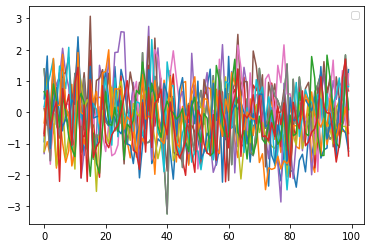

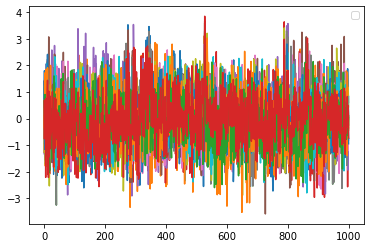

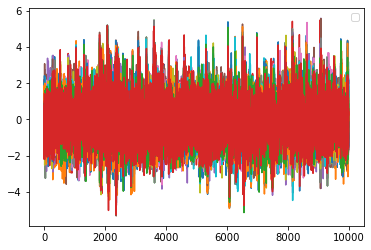

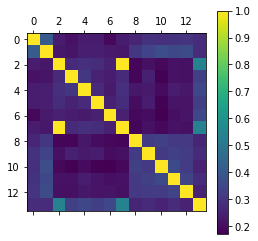

In [21]:
c_ravel = []
for t in ts_2D: 
    c = np.corrcoef(t)
    c_tri = c[np.triu_indices(c.shape[0], 1)]
    c_flat = np.ravel(c_tri)
    c_norm = (c_flat-np.mean(c_flat))/np.std(c_flat)
    c_ravel.append(c_norm)

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:100], alpha=1)
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:1000], alpha=1)
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(111)
for c in c_ravel: 
    plt.plot(c[0:10000], alpha=1)
ax.legend()




c_ravel = np.array(c_ravel)
print(c_ravel.shape )

corr = np.corrcoef(c_ravel)
plt.matshow(corr)
plt.colorbar()
